In [1]:
import pandas
import numpy as np

In [2]:
loan_result = pandas.read_csv('/Users/parksimon/Desktop/loan_result.csv')
log_data = pandas.read_csv('/Users/parksimon/Desktop/log_data.csv')
user_spec = pandas.read_csv('/Users/parksimon/Desktop/user_spec.csv')

In [3]:
not_nan = loan_result[loan_result['is_applied'].notnull()]
not_nan

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
13284,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0
13285,576643,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0
13286,576643,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0
13287,2136706,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0
13288,2136706,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0
...,...,...,...,...,...,...,...
13519634,1969227,2022-05-16 14:42:58,2,7,30000000.0,13.6,0.0
13519635,1969227,2022-05-16 14:42:57,33,110,9000000.0,14.4,0.0
13519636,1969227,2022-05-16 14:42:56,50,142,3000000.0,11.2,0.0
13519637,1969227,2022-05-16 14:43:18,22,100,4000000.0,15.3,0.0


In [4]:
sorted_nan = not_nan.sort_values(by='application_id')

sorted_spec = user_spec.sort_values(by='application_id')

In [5]:
sorted_nan.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
10972632,1,2022-05-06 11:05:42,59,150,19000000.0,17.7,0.0
10972631,1,2022-05-06 11:05:43,50,142,18000000.0,19.9,0.0
10972630,1,2022-05-06 11:05:44,37,206,32000000.0,18.9,0.0
10972629,1,2022-05-06 11:05:43,38,223,19000000.0,17.1,0.0
10972628,1,2022-05-06 11:05:56,38,16,19000000.0,17.1,0.0


In [6]:
sorted_spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
535078,1,777860,1990.0,1.0,2022-05-06 11:05:42,580.0,40000000.0,EARNEDINCOME,201702.0,정규직,전월세,30000000.0,대환대출,0.0,0.0,NaN,NaN
705026,2,28169,1981.0,1.0,2022-04-13 10:57:03,590.0,43000000.0,EARNEDINCOME,201903.0,정규직,자가,10000000.0,생활비,NaN,NaN,12.0,204000000.0
206459,3,492886,1955.0,1.0,2022-05-13 18:11:51,520.0,20000000.0,FREELANCER,201201.0,기타,전월세,3000000.0,생활비,0.0,NaN,4.0,66000000.0
359412,4,209531,1978.0,0.0,2022-06-20 10:24:36,720.0,26000000.0,EARNEDINCOME,20100301.0,정규직,기타가족소유,16000000.0,생활비,0.0,NaN,5.0,67000000.0
1236114,6,59078,1991.0,1.0,2022-04-26 02:02:44,630.0,36000000.0,EARNEDINCOME,202202.0,정규직,전월세,36000000.0,대환대출,0.0,NaN,4.0,72000000.0


In [7]:
tmp_df = pandas.merge(left=sorted_nan, right=sorted_spec, how="inner", on="application_id")

tmp_df = tmp_df.dropna(subset=['loan_limit', 'loan_rate', 'credit_score', 'yearly_income', 'desired_amount', 'is_applied'], axis = 0)

x_df = tmp_df.loc[:, ['loan_limit', 'loan_rate', 'credit_score', 'yearly_income', 'desired_amount']]
y_df = tmp_df.loc[:, ['is_applied']]

In [8]:
print(tmp_df.shape)
x_df = x_df.astype('int')
y_df = y_df.astype('int')

print(x_df.shape)
print(y_df.shape)

#x = x_df.to_numpy()
y = y_df.to_numpy()
print(y.shape)

(9021089, 23)
(9021089, 5)
(9021089, 1)
(9021089, 1)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_df)

print(x_scaled.shape)

(9021089, 5)


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

train_X, test_X = x_scaled[0 : 5000000], x_scaled[5000000:]
train_Y, test_Y = y[0 : 5000000], y[5000000:]

decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split=30)
parameters = {'max_depth': [3, 10, None]}

grid_search = GridSearchCV(decision_tree, parameters, cv=3, scoring='accuracy')

grid_search.fit(train_X, train_Y)
print(grid_search.best_params_)

{'max_depth': 3}


In [29]:
from sklearn.metrics import classification_report
model_best = grid_search.best_estimator_
prediction = model_best.predict(test_X)

print(test_Y.shape)
print(test_X.shape)
print(classification_report(test_Y, prediction))

(4021089, 1)
(4021089, 5)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97   3796780
           1       0.00      0.00      0.00    224309

    accuracy                           0.94   4021089
   macro avg       0.47      0.50      0.49   4021089
weighted avg       0.89      0.94      0.92   4021089



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from six import StringIO
from IPython.core.display import Image

In [34]:
export_graphviz(grid_search.best_estimator_, out_file="tree.dot", class_names = ['not_applied', 'applied'], feature_names = ['loan_limit', 'loan_rate', 'credit_score', 'yearly_income', 'desired_amount'],
                 impurity = True, filled=True)

In [35]:
graph = pydotplus.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

True

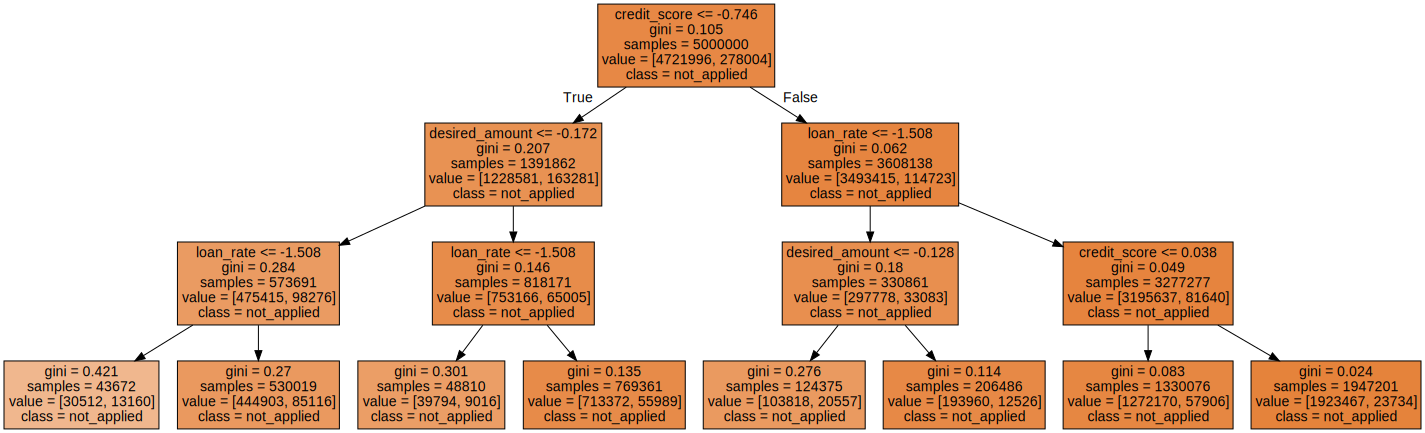

In [36]:
with open("tree.dot") as f:
    tree_graph = f.read()
display(graphviz.Source(tree_graph))